In [1]:
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from datetime import datetime

# Load actors with score

In [4]:
actors = pd.read_csv('fomc_scorecard.csv', sep=";", index_col=3, header=0)

In [5]:
actors = actors[actors['Score'] != 0]
actors

,Name,Score,Shifted score
Article name,,,
Janet Yellen,"Janet L. Yellen, Chair",-1,1
Lael Brainard,Lael Brainard,-2,0
Daniel Tarullo,Daniel K. Tarullo,-2,0
William Dudley,"William C. Dudley, Vice Chairman",-1,1
James Bullard,James Bullard,1,3
Esther George,Esther L. George,2,4
Loretta Mester,Loretta J. Mester,1,3
Eric Rosengren,Eric Rosengren,-2,0
Charles Evans,Charles L. Evans,-2,0


# Load articles

In [6]:
from pymongo import MongoClient

In [7]:
client = MongoClient('localhost', 27017)
fomc_collection = client.python_import.fomc_articles

In [8]:
fomc_articles = pd.DataFrame(list(fomc_collection.find()))
fomc_articles.set_index('_id', inplace=True)
fomc_articles.head()

,ParticipantJobTitle,ParticipantLocation,ParticipantName,ParticipantTitleLastName,ParticipantUrl,RemarkDate,RemarkDescription,RemarkType,content,date,url
_id,,,,,,,,,,,
58cab2973740f50f2c6fdccb,Pres.,Richmond,Jeffrey Lacker,Pres. Lacker,/fomcspeak/jeffrey-lacker,"Dec. 03, 2013",Lacker Testifies on Bankruptcy and Financial I...,Testimony,Good morning. I am honored to speak to the Sub...,2013-12-03 00:00:00,https://www.richmondfed.org/press_room/speeche...
58cab29a3740f50f2c6fdccc,Pres.,New York,William Dudley,Pres. Dudley,/fomcspeak/william-dudley,"Jul. 02, 2013 (12:30 PM ET)",The National and Regional Economy,Speech,"Working within the Federal Reserve System, the...",2013-07-02 12:30:00,https://www.newyorkfed.org/newsevents/speeches...
58cab29c3740f50f2c6fdccd,Gov.,Board of Governors,Sarah Bloom Raskin,Gov. Raskin,/fomcspeak/pastparticipants/sarah-bloom-raskin,"Apr. 18, 2013 (12:00 PM ET)",Aspects of Inequality in the Recent Business C...,Speech,Aspects of Inequality in the Recent Business C...,2013-04-18 12:00:00,https://www.federalreserve.gov/newsevents/spee...
58cab29e3740f50f2c6fdcce,Pres.,Richmond,Jeffrey Lacker,Pres. Lacker,/fomcspeak/jeffrey-lacker,"Apr. 18, 2013 (8:06 AM ET)",Fed's Lacker Would End QE Now,Video Interview,Fed's Lacker Would End QE Now\n\t\t\t\t\n In a...,2013-04-18 08:06:00,http://video.cnbc.com/gallery/?video=3000162414
58cab29e3740f50f2c6fdccf,Gov.,Board of Governors,Jeremy Stein,Gov. Stein,/fomcspeak/pastparticipants/jeremy-stein,"Feb. 07, 2013 (9:30 AM ET)","Overheating in Credit Markets: Origins, Measur...",Speech,"Overheating in Credit Markets: Origins, Measur...",2013-02-07 09:30:00,https://www.federalreserve.gov/newsevents/spee...


In [9]:
fomc_articles['ParticipantName'].unique()

array(['Jeffrey Lacker', 'William Dudley', 'Sarah Bloom Raskin',
       'Jeremy Stein', 'Charles Evans', 'Janet Yellen', 'Eric Rosengren',
       'Richard Fisher', 'James Bullard', 'John Williams',
       'Dennis Lockhart', 'Elizabeth Duke', 'Daniel Tarullo',
       'Charles Plosser', 'Jerome Powell', 'Narayana Kocherlakota',
       'Ben Bernanke', 'Loretta Mester', 'Stanley Fischer',
       'Esther George', 'Lael Brainard', 'Patrick Harker', 'Robert Kaplan',
       'Neel Kashkari'], dtype=object)

In [10]:
len(fomc_articles['ParticipantName'].unique())

24

In [11]:
actors.index

Index(['Janet Yellen', 'Lael Brainard', 'Daniel Tarullo', 'William Dudley',
       'James Bullard', 'Esther George', 'Loretta Mester', 'Eric Rosengren',
       'Charles Evans', 'Patrick Harker', 'Robert Kaplan', 'Jeffrey Lacker'],
      dtype='object', name='Article name')

In [12]:
len(actors.index)

12

#### There is a difference in the score sheet and the unique actors: 12 vs 24
---

# Merge articles and actors score

In [13]:
fomc_articles_scored = fomc_articles.merge(actors, left_on='ParticipantName', right_index=True)
fomc_articles_scored.head(3)

,ParticipantJobTitle,ParticipantLocation,ParticipantName,ParticipantTitleLastName,ParticipantUrl,RemarkDate,RemarkDescription,RemarkType,content,date,url,Name,Score,Shifted score
_id,,,,,,,,,,,,,,
58cab2973740f50f2c6fdccb,Pres.,Richmond,Jeffrey Lacker,Pres. Lacker,/fomcspeak/jeffrey-lacker,"Dec. 03, 2013",Lacker Testifies on Bankruptcy and Financial I...,Testimony,Good morning. I am honored to speak to the Sub...,2013-12-03 00:00:00,https://www.richmondfed.org/press_room/speeche...,Jeffrey M. Lacker,2,4
58cab29e3740f50f2c6fdcce,Pres.,Richmond,Jeffrey Lacker,Pres. Lacker,/fomcspeak/jeffrey-lacker,"Apr. 18, 2013 (8:06 AM ET)",Fed's Lacker Would End QE Now,Video Interview,Fed's Lacker Would End QE Now\n\t\t\t\t\n In a...,2013-04-18 08:06:00,http://video.cnbc.com/gallery/?video=3000162414,Jeffrey M. Lacker,2,4
58cab29f3740f50f2c6fdcd0,Pres.,Richmond,Jeffrey Lacker,Pres. Lacker,/fomcspeak/jeffrey-lacker,"Apr. 18, 2013 (8:14 AM ET)",Fed's Lacker Favors 'Living Wills' For Banks,Video Interview,Fed's Lacker Favors 'Living Wills' For Banks\n...,2013-04-18 08:14:00,http://video.cnbc.com/gallery/?video=3000162401,Jeffrey M. Lacker,2,4


In [14]:
len(fomc_articles_scored['ParticipantName'].unique())

12

# Number of articles in each score class

In [15]:
fomc_articles_scored.groupby('Shifted score')['url'].count()

Shifted score
0    148
1    168
3    150
4     72
Name: url, dtype: int64

# Create train data and test data

In [16]:
train_data = fomc_articles_scored[fomc_articles_scored['date'] < datetime(2016, 1, 1)]
test_data = fomc_articles_scored[fomc_articles_scored['date'] >= datetime(2016, 1, 1)]

In [17]:
X_train = train_data['content']
y_train = train_data['Shifted score']
X_test = test_data['content']
y_test = test_data['Shifted score']

In [18]:
X_train.head()

_id
58cab2973740f50f2c6fdccb    Good morning. I am honored to speak to the Sub...
58cab29e3740f50f2c6fdcce    Fed's Lacker Would End QE Now\n\t\t\t\t\n In a...
58cab29f3740f50f2c6fdcd0    Fed's Lacker Favors 'Living Wills' For Banks\n...
58cab2a53740f50f2c6fdce1    Download MP3\n The invitation to address you t...
58cab2b23740f50f2c6fdd0a    Let me start by welcoming the Global Interdepe...
Name: content, dtype: object

In [19]:
y_train.head()

_id
58cab2973740f50f2c6fdccb    4
58cab29e3740f50f2c6fdcce    4
58cab29f3740f50f2c6fdcd0    4
58cab2a53740f50f2c6fdce1    4
58cab2b23740f50f2c6fdd0a    4
Name: Shifted score, dtype: int64

# Create TF matrix from CountVectorizer

In [20]:
#from sklearn.feature_extraction import text
#excludes = ['804', 'videos', 'podcasts', 'sign up', 'twitter', 'subscriptions', 'facebook', 'photos']
#stop_words = text.ENGLISH_STOP_WORDS.union(excludes)

In [21]:
vectorizer = CountVectorizer(ngram_range=(1,3), max_df=0.3, min_df=2, stop_words='english')

In [22]:
vectorizer.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.3, max_features=None, min_df=2,
        ngram_range=(1, 3), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [23]:
vectorizer.get_feature_names()

['000',
 '000 2013',
 '000 adjusting',
 '000 april',
 '000 april estimation',
 '000 average',
 '000 banks',
 '000 banks failed',
 '000 banks united',
 '000 close',
 '000 close monthly',
 '000 compared',
 '000 compared 27',
 '000 contrast',
 '000 contrast employment',
 '000 discouraged',
 '000 discouraged workers',
 '000 dropouts',
 '000 dropouts borrowed',
 '000 half',
 '000 half year',
 '000 high',
 '000 high college',
 '000 households',
 '000 january',
 '000 jobs',
 '000 jobs lost',
 '000 jobs month',
 '000 jobs months',
 '000 jobs october',
 '000 jobs past',
 '000 july',
 '000 july year',
 '000 manufacturing',
 '000 manufacturing jobs',
 '000 mark',
 '000 mark longer',
 '000 mark time',
 '000 million',
 '000 month',
 '000 month 2014',
 '000 month certainly',
 '000 month gain',
 '000 month half',
 '000 month pace',
 '000 month past',
 '000 month quite',
 '000 month resulting',
 '000 pace',
 '000 pace slowing',
 '000 people',
 '000 plus',
 '000 previous',
 '000 previous years',
 '000 

In [24]:
len(vectorizer.get_feature_names())

94671

In [25]:
X_train_dtm = vectorizer.transform(X_train)

In [26]:
X_test_dtm = vectorizer.transform(X_test)
X_test_dtm

<190x94671 sparse matrix of type '<class 'numpy.int64'>'
	with 117892 stored elements in Compressed Sparse Row format>

# Building a model

In [27]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [28]:
nb.fit(X_train_dtm, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [29]:
y_pred_class = nb.predict(X_test_dtm)

In [30]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [31]:
accuracy_score(y_test, y_pred_class)

0.86842105263157898

#### Confusion matrix
By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
is equal to the number of observations known to be in group :math:`i` but
predicted to be in group :math:`j`.

In [32]:
cm = confusion_matrix(y_test, y_pred_class)
cm

array([[42,  5,  1,  0],
       [ 3, 61,  6,  2],
       [ 0,  1, 52,  0],
       [ 2,  5,  0, 10]])

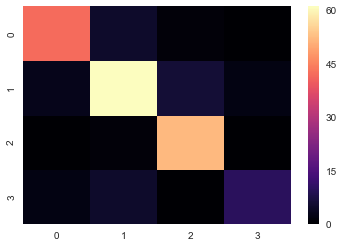

In [33]:
sns.heatmap(cm, cmap='magma')

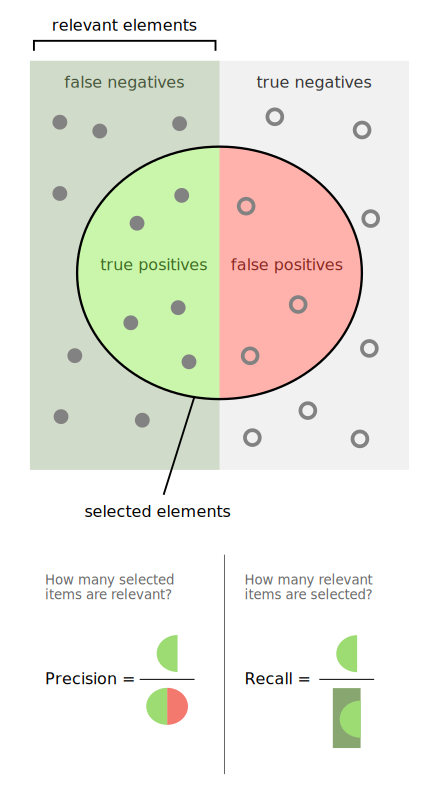

In [34]:
from IPython.display import SVG, display
def show_svg():
    display(SVG(url='https://upload.wikimedia.org/wikipedia/commons/2/26/Precisionrecall.svg'))
show_svg()

In [35]:
cr = classification_report(y_test, y_pred_class)
print(cr)

             precision    recall  f1-score   support

          0       0.89      0.88      0.88        48
          1       0.85      0.85      0.85        72
          3       0.88      0.98      0.93        53
          4       0.83      0.59      0.69        17

avg / total       0.87      0.87      0.87       190



# Exploring the model

In [36]:
nb.feature_count_

array([[  59.,    0.,    1., ...,    0.,    0.,    0.],
       [ 102.,    5.,    1., ...,    0.,    0.,    0.],
       [  21.,    1.,    0., ...,    0.,    0.,    0.],
       [  32.,    0.,    0., ...,    2.,    2.,    2.]])

In [37]:
dovish = nb.feature_count_[0,:]
little_dovish = nb.feature_count_[1,:]
little_hawkish = nb.feature_count_[2,:]
hawkish = nb.feature_count_[3,:]

In [38]:
X_train_tokens = vectorizer.get_feature_names()
tokens = pd.DataFrame({'dovish':dovish, 'dovish_little':little_dovish, 'hawkish_little':little_hawkish, 'hawkish':hawkish}, index=X_train_tokens)

In [39]:
tokens.sample(30, random_state=15)

,dovish,dovish_little,hawkish,hawkish_little
percent 24 year,0.0,0.0,6.0,0.0
longer term structural,1.0,2.0,0.0,0.0
market increasingly concerned,0.0,2.0,0.0,0.0
saying raising,3.0,0.0,0.0,0.0
planning processes effectively,2.0,0.0,0.0,0.0
time essential,0.0,0.0,2.0,0.0
persisted recession,0.0,2.0,0.0,0.0
measure underemployment includes,0.0,2.0,0.0,0.0
high quality early,0.0,0.0,6.0,0.0
improvements labor market,3.0,5.0,4.0,0.0


In [40]:
filtered_tokens = tokens[(tokens['dovish'] + tokens['dovish_little'] > 0) & (tokens['hawkish'] + tokens['hawkish_little'] > 0)]

In [41]:
filtered_tokens['hawkishness_score'] = (filtered_tokens['hawkish'] + filtered_tokens['hawkish_little'])/(filtered_tokens['dovish'] + filtered_tokens['dovish_little'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


#### Hawkishness score ordered by descending

In [42]:
filtered_tokens.sort_values(by='hawkishness_score', ascending=False)

,dovish,dovish_little,hawkish,hawkish_little,hawkishness_score
bullard,0.0,1.0,0.0,190.0,190.000000
reserve bank richmond,0.0,1.0,64.0,1.0,65.000000
richmond,1.0,1.0,127.0,3.0,65.000000
bank richmond,0.0,1.0,64.0,1.0,65.000000
great moderation,0.0,1.0,57.0,1.0,58.000000
president bullard,0.0,1.0,0.0,51.0,51.000000
moderation,0.0,2.0,57.0,1.0,29.000000
inflation averaged,1.0,0.0,25.0,0.0,25.000000
personal income,0.0,1.0,21.0,2.0,23.000000
box,1.0,0.0,1.0,22.0,23.000000


In [43]:
only_dovish = tokens[(tokens.dovish > 0) & (tokens.dovish_little == 0) & (tokens.hawkish == 0) & (tokens.hawkish_little == 0)].sort_values('dovish', ascending=False)
only_dovish_little = tokens[(tokens.dovish == 0) & (tokens.dovish_little > 0) & (tokens.hawkish == 0) & (tokens.hawkish_little == 0)].sort_values('dovish_little', ascending=False)
only_hawkish_little = tokens[(tokens.dovish == 0) & (tokens.dovish_little == 0) & (tokens.hawkish == 0) & (tokens.hawkish_little > 0)].sort_values('hawkish_little', ascending=False)
only_hawkish = tokens[(tokens.dovish == 0) & (tokens.dovish_little == 0) & (tokens.hawkish > 0) & (tokens.hawkish_little == 0)].sort_values('hawkish', ascending=False)

In [44]:
only_dovish.head(10)

,dovish,dovish_little,hawkish,hawkish_little
zlb,98.0,0.0,0.0,0.0
financial holding,41.0,0.0,0.0,0.0
sft,39.0,0.0,0.0,0.0
capital regulation,38.0,0.0,0.0,0.0
financial holding companies,31.0,0.0,0.0,0.0
goal oriented,27.0,0.0,0.0,0.0
copyright,26.0,0.0,0.0,0.0
rights reserved,26.0,0.0,0.0,0.0
rights reserved review,26.0,0.0,0.0,0.0
copyright 2016 rights,26.0,0.0,0.0,0.0


In [45]:
only_dovish_little.head(10)

,dovish,dovish_little,hawkish,hawkish_little
second district,0.0,102.0,0.0,0.0
working federal,0.0,100.0,0.0,0.0
governance culture reform,0.0,98.0,0.0,0.0
designed foster,0.0,98.0,0.0,0.0
governance culture,0.0,98.0,0.0,0.0
governance reform,0.0,98.0,0.0,0.0
hub designed,0.0,98.0,0.0,0.0
discussion corporate governance,0.0,98.0,0.0,0.0
hub designed foster,0.0,98.0,0.0,0.0
discussion corporate,0.0,98.0,0.0,0.0


In [46]:
only_hawkish_little.head(10)

,dovish,dovish_little,hawkish,hawkish_little
louis fed,0.0,0.0,0.0,88.0
st louis fed,0.0,0.0,0.0,88.0
james bullard,0.0,0.0,0.0,81.0
president james,0.0,0.0,0.0,75.0
president james bullard,0.0,0.0,0.0,75.0
louis fed president,0.0,0.0,0.0,68.0
fed president james,0.0,0.0,0.0,67.0
bullard said,0.0,0.0,0.0,50.0
james bullard said,0.0,0.0,0.0,44.0
cleveland fed,0.0,0.0,0.0,36.0


In [47]:
only_hawkish.head(10)

,dovish,dovish_little,hawkish,hawkish_little
lacker,0.0,0.0,60.0,0.0
jeffrey lacker,0.0,0.0,42.0,0.0
rescues,0.0,0.0,36.0,0.0
unassisted,0.0,0.0,33.0,0.0
assistance preparing,0.0,0.0,31.0,0.0
assistance preparing remarks,0.0,0.0,28.0,0.0
newport,0.0,0.0,25.0,0.0
goodfriend,0.0,0.0,24.0,0.0
fed fdic,0.0,0.0,22.0,0.0
lacker speech,0.0,0.0,22.0,0.0


# Logistic Regression model

In [48]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [49]:
logreg.fit(X_train_dtm, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [50]:
y_pred_class = logreg.predict(X_test_dtm)

In [51]:
y_pred_prob = logreg.predict_proba(X_test_dtm)

In [52]:
y_pred_prob = y_pred_prob[:,1]

In [53]:
accuracy_score(y_test, y_pred_class)

0.78947368421052633

In [54]:
print(classification_report(y_test, y_pred_class))

             precision    recall  f1-score   support

          0       0.79      0.94      0.86        48
          1       0.88      0.51      0.65        72
          3       0.98      1.00      0.99        53
          4       0.41      0.88      0.56        17

avg / total       0.84      0.79      0.79       190



#### I's much worse, than the Naive Baiyes model
---